# NLP Explore Exercises

01 March 2023, afternoon



In [1]:
# imports

import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p

from wordcloud import WordCloud
from nltk.corpus import stopwords

from env import get_connection

### 1/ Spam Data : Load the spam data set.
    Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    Is there any overlap in the bigrams for the spam data and the ham data?
    Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.



In [2]:
# SQL database url

url = get_connection('spam_db')

# define SQL query
query = '''
        SELECT *
        FROM spam
        '''

# read SQL
df = pd.read_sql(query, url, index_col = 'id')

In [3]:
# imported df 

df.head(3)

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
df.shape

(5572, 2)

In [5]:
# function to clean df

def cleaning(text, extra_stops = []):
    
    wln = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stops
    
    # removing accents, etc : normalisation
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8').lower())
    
    # remove special characters (punctuation)
    text = re.sub(r"[^\w\s]",'', text).split()

    # list comprehension
    return [wln.lemmatize(word) for word in text if word not in stopwords]

In [6]:
# use a single space to connect the list of words together into a body of text
# setting variables to cleaned text and joining together from df['text']

ham_words = cleaning(' '.join(df[df['label'] == 'ham']['text']))
spam_words = cleaning(' '.join(df[df['label'] == 'spam']['text']))
all_words = cleaning(' '.join(df['text']))

In [7]:
# setting the cleaned txt to Series and counting word frequency

ham_count = pd.Series(ham_words).value_counts()
spam_count = pd.Series(spam_words).value_counts()
all_count = pd.Series(all_words).value_counts()

In [8]:
# creating df with value counts of all the words

freq = pd.concat([ham_count, spam_count, all_count], axis = 1)
freq.sample()

,0,1,2
sucker,2.0,NaN,2


In [9]:
# looking at nulls

freq.isnull().sum()

0    1918
1    6086
2       0
dtype: int64

In [10]:
# dealing with nulls and col names

freq.columns = ['ham', 'spam', 'all']

freq.fillna(0, inplace = True)

In [11]:
freq.head(3)

,ham,spam,all
u,1027.0,155.0,1182
im,449.0,13.0,462
get,314.0,83.0,397


In [12]:
# wordtypes

freq.dtypes

ham     float64
spam    float64
all       int64
dtype: object

In [13]:
# changing to int

freq = freq.astype('int')

In [14]:
# making HAM bigrams

hambi = pd.Series(nltk.ngrams(ham_words, 2))
hambi.head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [15]:
# making HAM trigrams

hamtri = pd.Series(nltk.ngrams(ham_words, 3))
hamtri.head()

0          (go, jurong, point)
1       (jurong, point, crazy)
2    (point, crazy, available)
3    (crazy, available, bugis)
4        (available, bugis, n)
dtype: object

In [16]:
# making SPAM bigrams

spambi = pd.Series(nltk.ngrams(spam_words, 2))
spambi.head()

0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
dtype: object

In [17]:
# making SPAM trigrams

spamtri = pd.Series(nltk.ngrams(spam_words, 3))
spamtri.head()

0     (free, entry, 2)
1     (entry, 2, wkly)
2      (2, wkly, comp)
3    (wkly, comp, win)
4      (comp, win, fa)
dtype: object

In [18]:
# adding spam bigrams to df

df['spambi'] = spambi
df.head()

,label,text,spambi
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...","(free, entry)"
1,ham,Ok lar... Joking wif u oni...,"(entry, 2)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(2, wkly)"
3,ham,U dun say so early hor... U c already then say...,"(wkly, comp)"
4,ham,"Nah I don't think he goes to usf, he lives aro...","(comp, win)"


In [19]:
# top ham bigrams

fav_hambi = hambi.value_counts().head(30)

In [20]:
# top ham trigrams

fav_hamtri = hamtri.value_counts().head(30)
fav_hamtri

(ill, call, later)             42
(sorry, ill, call)             38
(u, wan, 2)                    21
(happy, new, year)             19
(pls, send, message)           13
(right, pls, send)             12
(cant, pick, phone)            12
(pick, phone, right)           12
(phone, right, pls)            12
(hi, hi, hi)                   11
(x, x, x)                       8
(wat, time, u)                  8
(wan, 2, go)                    7
(good, morning, dear)           7
(u, dun, wan)                   6
(u, lose, u)                    6
(call, later, meeting)          6
(kiss, across, sea)             6
(u, feel, u)                    6
(wat, r, u)                     6
(convey, birthday, wish)        6
(pls, convey, birthday)         6
(n, kid, went)                  5
(pa, said, happy)               5
(said, happy, bday)             5
(cabin, pa, said)               5
(lunch, invited, apartment)     5
(forgot, n, kid)                5
(parent, forgot, n)             5
(didnt, wish, 

In [21]:
# top spam bigrams

fav_spambi = spambi.value_counts().head(30)

In [22]:
# top spam trigrams

fav_spamtri = spamtri.value_counts().head(30)

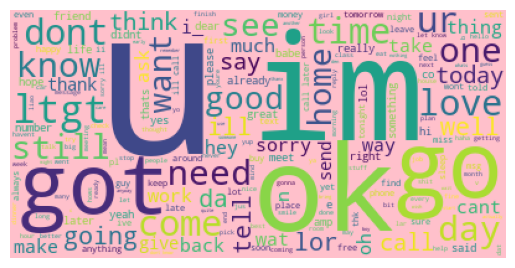

In [23]:
# ham word cloud

ham_cloud = WordCloud(background_color = 'pink').generate(' '.join(ham_words))

plt.imshow(ham_cloud)
plt.axis('off')

plt.show()

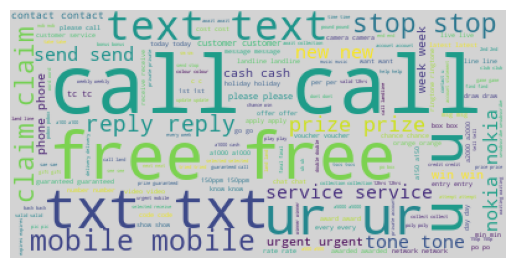

In [24]:
# spam word cloud

# unpacking the bigram tuples
pam_cloud = WordCloud(background_color = 'lightgrey').generate(' '.join(' '.join(tup) for tup in spambi))



# result = ''.join(''.join(tup) for tup in my_list)

plt.imshow(pam_cloud)
plt.axis('off')

plt.show(pam_cloud)

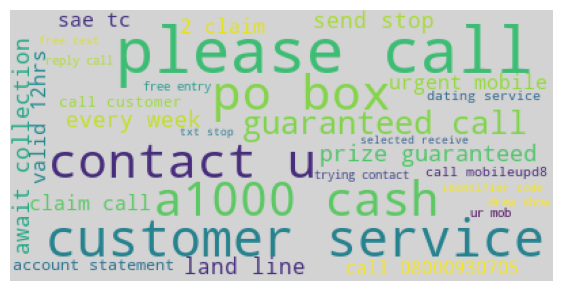

In [25]:
# fav_spambi wordcloud

# variable to contain dico of bigram key words and value count
donnees = {key[0] + ' ' + key[1] : value for key, value in fav_spambi.to_dict().items()}

# image variable to contain the wc of generated value counts
wc = WordCloud(background_color = 'lightgrey').generate_from_frequencies(donnees)

plt.figure(figsize=(7, 7))
plt.imshow(wc)
plt.axis('off')

plt.show()


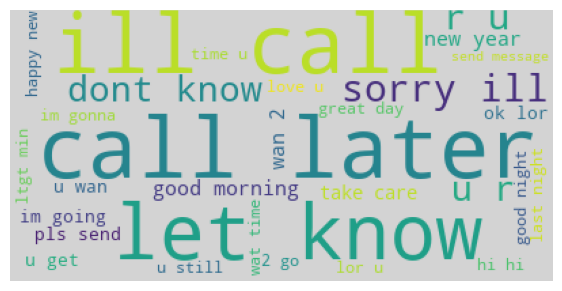

In [26]:
# fav_hambi wordcloud

# variable to contain dico of bigram key words and value count
donnees = {key[0] + ' ' + key[1] : value for key, value in fav_hambi.to_dict().items()}

# image variable to contain the wc of generated value counts
wc = WordCloud(background_color = 'lightgrey').generate_from_frequencies(donnees)

plt.figure(figsize=(7, 7))
plt.imshow(wc)
plt.axis('off')

plt.show()

**Takeaways : According to the word clouds for ham and for spam, the most popular words do not overlap.** 

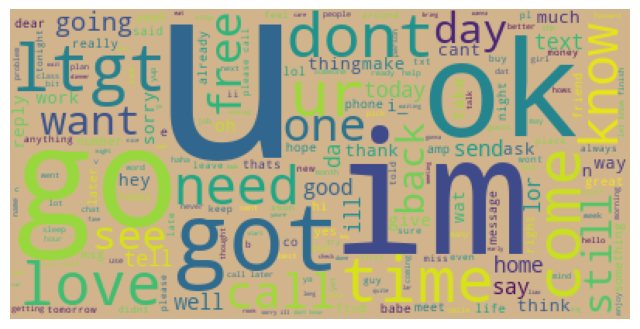

In [27]:
# all_words word cloud

all_cloud = WordCloud(background_color = 'tan').generate(' '.join(all_words))
plt.figure(figsize = (8, 5))
plt.imshow(all_cloud)
plt.axis('off')

plt.show()

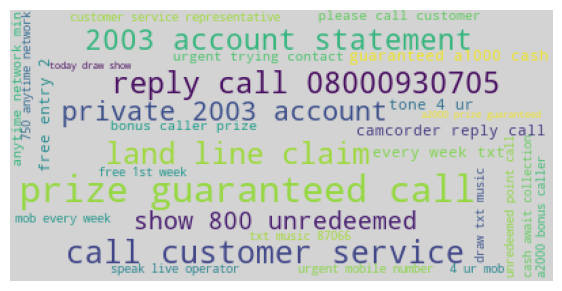

In [68]:
# fav_spamtri wordcloud

# variable to contain dico of bigram key words and value count
donnees3 = {key[0] + ' ' + key[1] + ' ' + key[2] : value for key, value in fav_spamtri.to_dict().items()}

# image variable to contain the wc of generated value counts
wc3 = WordCloud(background_color = 'lightgrey').generate_from_frequencies(donnees3)

plt.figure(figsize=(7, 7))
plt.imshow(wc3)
plt.axis('off')

plt.show()


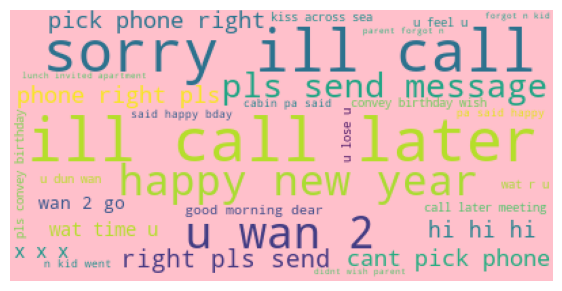

In [67]:
# fav_hamtri wordcloud

# variable to contain dico of bigram key words and value count
donnees4 = {key[0] + ' ' + key[1] + ' ' + key[2]: value for key, value in fav_hamtri.to_dict().items()}

# image variable to contain the wc of generated value counts
wc4 = WordCloud(background_color = 'pink').generate_from_frequencies(donnees4)

plt.figure(figsize=(7, 7))
plt.imshow(wc4)
plt.axis('off')

plt.show()

## 2/ Explore the blog articles using the techniques discussed in the exploration lesson.


In [30]:
# acquiring json

blog = pd.read_json('blog_posts.json')

In [31]:
blog.head(3)

,title,link,date_published,content
0,Black Excellence in Tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 16, 2023",\nBlack excellence in tech: Panelist Spotlight...
1,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 13, 2023",\nBlack excellence in tech: Panelist Spotlight...
2,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 10, 2023",\nBlack excellence in tech: Panelist Spotlight...


In [32]:
# applying cleaning to df and assigning col

blog['cleaned'] = blog['content'].apply(p.cleaning)

In [33]:
blog['cleaned']

0    black excellence tech panelist spotlight wilma...
1    black excellence tech panelist spotlight steph...
2    black excellence tech panelist spotlight james...
3    black excellence tech panelist spotlight jeani...
4    youre interested embarking career tech likely ...
5    codeup pleased announce ranked among 58 best c...
Name: cleaned, dtype: object

In [34]:
blog.head()

,title,link,date_published,content,cleaned
0,Black Excellence in Tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 16, 2023",\nBlack excellence in tech: Panelist Spotlight...,black excellence tech panelist spotlight wilma...
1,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 13, 2023",\nBlack excellence in tech: Panelist Spotlight...,black excellence tech panelist spotlight steph...
2,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 10, 2023",\nBlack excellence in tech: Panelist Spotlight...,black excellence tech panelist spotlight james...
3,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/codeup-news/codeup-best-boo...,"Feb 6, 2023",\nBlack excellence in tech: Panelist Spotlight...,black excellence tech panelist spotlight jeani...
4,Coding Bootcamp or Self-Learning? Which is Bes...,https://codeup.com/codeup-news/codeup-best-boo...,"Jan 20, 2023",\nIf you’re interested in embarking on a caree...,youre interested embarking career tech likely ...


In [35]:
blog['cleaned']

0    black excellence tech panelist spotlight wilma...
1    black excellence tech panelist spotlight steph...
2    black excellence tech panelist spotlight james...
3    black excellence tech panelist spotlight jeani...
4    youre interested embarking career tech likely ...
5    codeup pleased announce ranked among 58 best c...
Name: cleaned, dtype: object

In [36]:
#returning all the words in article individually

words = cleaning(' '.join(blog['cleaned']))

# setting the cleaned txt to Series and counting word frequency
count = pd.Series(words).value_counts()
count

codeup         27
tech           18
black          17
coding         14
program        13
               ..
worked          1
prior           1
inclusivity     1
advocacy        1
ranking         1
Length: 515, dtype: int64

In [37]:
# creating df with value counts of all the words

freq = pd.DataFrame([words])

# transposing``
freq = freq.T
freq

,0
0,black
1,excellence
2,tech
3,panelist
4,spotlight
...,...
992,report
993,recognizing
994,school
995,year


In [38]:
# freq.reset_index()

In [69]:
# renaming

freq.columns = ['word_list']
freq.head(2)

,word_list
0,black
1,excellence


In [40]:
freq.dtypes

word_list    object
dtype: object

In [41]:
top_freq = freq.value_counts().head(15)
top_freq

word_list  
codeup         27
tech           18
black          17
coding         14
program        13
experience     13
panelist       11
excellence     10
student        10
career         10
bootcamps      10
james           9
opportunity     9
february        8
support         8
dtype: int64

In [42]:
# making blog bigrams using 'words' variable

bligrams = pd.Series(nltk.ngrams(words, 2))
# same as : 
# bligrams = pd.Series(nltk.ngrams(freq['word_list'], 2))
bligrams.head(2)

0    (black, excellence)
1     (excellence, tech)
dtype: object

In [43]:
# top blog bigrams


fav_bligrams = bligrams.value_counts().head(30)
fav_bligrams

(black, excellence)           9
(coding, bootcamps)           9
(excellence, tech)            9
(course, report)              5
(tech, industry)              5
(tech, panel)                 5
(experience, black)           4
(panelist, leading)           4
(leading, discussion)         4
(discussion, learn)           4
(learn, bit)                  4
(bit, respective)             4
(respective, experience)      4
(leader, tech)                4
(black, leader)               4
(like, spotlight)             4
(industry, meet)              4
(experience, codeup)          4
(february, 22nd)              4
(sit, insightful)             4
(insightful, conversation)    4
(spotlight, panelist)         4
(22nd, sit)                   4
(wed, like)                   4
(black, history)              4
(tech, panelist)              4
(panelist, spotlight)         4
(codeup, hosting)             4
(honor, black)                4
(panel, honor)                4
dtype: int64

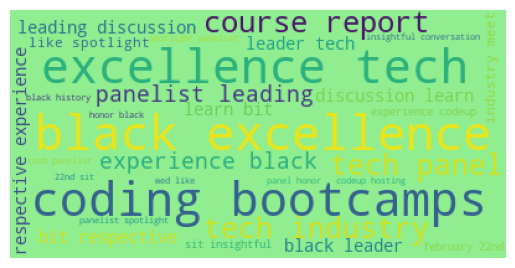

In [44]:
# fav_bligrams wordcloud

# variable to contain dico of bigram key words and value count
chiffres = {key[0] + ' ' + key[1] : value for key, value in fav_bligrams.to_dict().items()}

# image variable to contain the WC of the generated value counts
wc = WordCloud(background_color = 'lightgreen').generate_from_frequencies(chiffres)

plt.imshow(wc)
plt.axis('off')

plt.show()

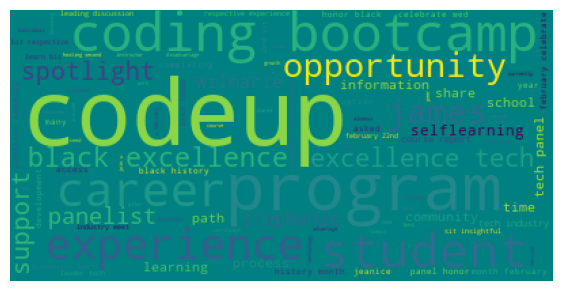

In [45]:
# general word cloud

allo = WordCloud(background_color = 'teal').generate(' '.join(words))
plt.figure(figsize = (7, 5))
plt.imshow(allo)
plt.axis('off')

plt.show()

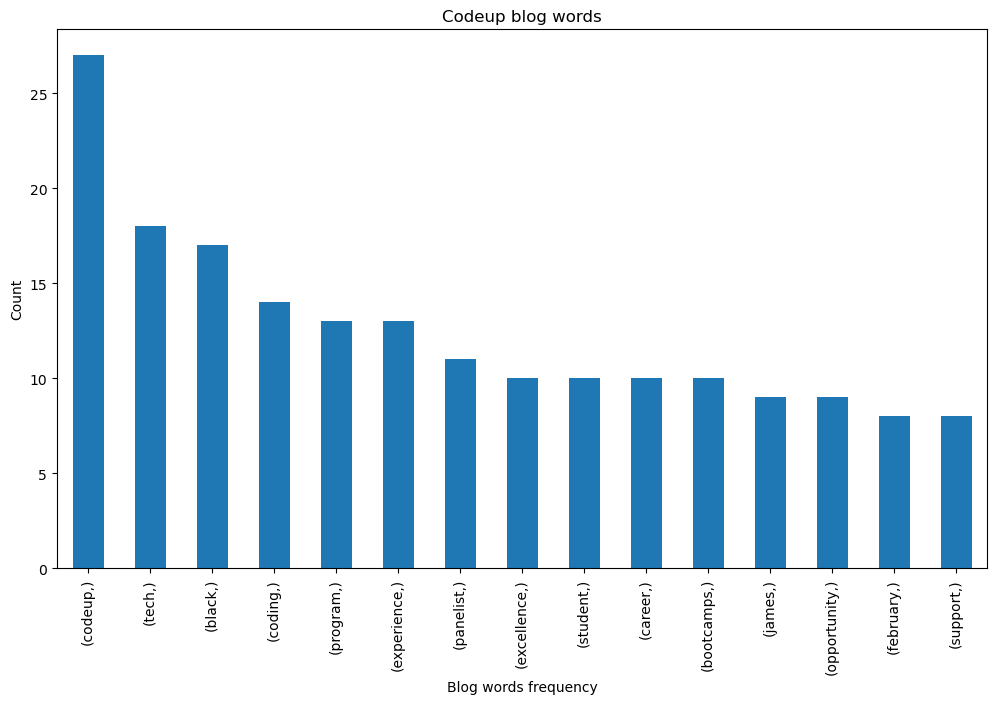

In [46]:
# most frequent words, label-coloured

top_freq.plot.bar(figsize = (12,7))

plt.title('Codeup blog words')

plt.ylabel('Count')
plt.xlabel('Blog words frequency')

plt.show()

In [64]:
# making blog trigrams using 'words' variable

blotgrams = pd.Series(nltk.ngrams(words, 3))

fav_blotgrams = blotgrams.value_counts().head(30)

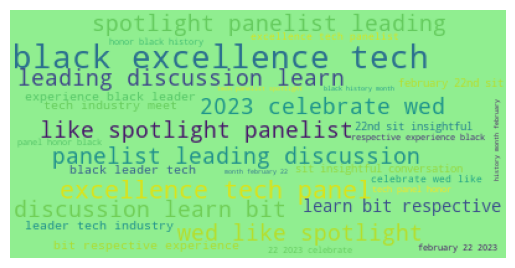

In [66]:
# fav_blotgrams wordcloud

# variable to contain dico of bigram key words and value count
chiffres = {key[0] + ' ' + key[1] + ' ' + key[2] : value for key, value in fav_blotgrams.to_dict().items()}

# image variable to contain the WC of the generated value counts
wc = WordCloud(background_color = 'lightgreen').generate_from_frequencies(chiffres)

plt.imshow(wc)
plt.axis('off')

plt.show()

### InShorts

In [47]:
# acquiring json

news = pd.read_json('news_articles.json')

In [83]:
news.sample(5)

,category,title,content,cleaned,cleaned_tech
37,sports,You've married most stubborn man I've met: Nay...,Reacting to cricketer Shardul Thakur marrying ...,reacting cricketer shardul thakur marrying lon...,NaN
10,business,No nation built more comprehensive digital inf...,Microsoft Co-founder Bill Gates said that no c...,microsoft cofounder bill gate said country bui...,NaN
23,business,Eli Lilly to cut insulin price by 70% for Amer...,Eli Lilly on Wednesday said it will reduce pri...,eli lilly wednesday said reduce price commonly...,NaN
63,technology,Google updates Chrome to increase battery life...,Google has announced several changes to its Ch...,google announced several change chrome web bro...,google announced several change chrome web bro...
82,entertainment,"Police warned of bombs at Ambani, Amitabh's Mu...",Nagpur Police on Tuesday reportedly received a...,nagpur police tuesday reportedly received anon...,NaN


In [79]:
# applying cleaning to technology category and assigning col

news['cleaned_tech'] = news[news['category'] == 'technology']['content'].apply(p.cleaning)

In [49]:
# applying cleaning to df and assigning col

news['cleaned'] = news['content'].apply(p.cleaning)

In [50]:
#returning all the words in article individually

news_words = cleaning(' '.join(news['cleaned']))

# setting the cleaned txt to Series and counting word frequency
news_count = pd.Series(news_words).value_counts()
news_count

said        81
india       66
added       36
test        27
gate        26
            ..
training     1
place        1
tribune      1
termed       1
1981         1
Length: 1800, dtype: int64

In [71]:
# creating df with value counts of all the words

freq_news = pd.DataFrame([news_words])

# # transposing``
freq_news = freq_news.T
freq_news.head(1)

,0
0,10


In [55]:
freq_news.columns = ['word_count']

In [72]:
freq_news.head(1)

,0
0,10


In [75]:
# making blog bigrams using 'words' variable

news_bigrams = pd.Series(nltk.ngrams(news_words, 2))

news_bigrams.head()

0         (10, adani)
1      (adani, group)
2      (group, stock)
3     (stock, closed)
4    (closed, higher)
dtype: object

In [58]:
# top news bigrams

fav_news_bigrams = news_bigrams.value_counts().head(30)

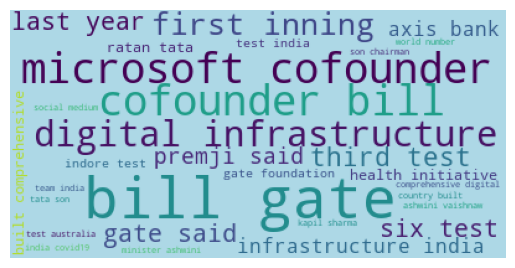

In [59]:
# fav_news_bigrams wordcloud

# variable to contain dico of bigram key words and value count
chif = {key[0] + ' ' + key[1] : value for key, value in fav_news_bigrams.to_dict().items()}

# image variable to contain the WC of the generated value counts
wc = WordCloud(background_color = 'lightblue').generate_from_frequencies(chif)

plt.imshow(wc)
plt.axis('off')

plt.show()

***TAKEAWAY : Bill Gates is experiencing a wave of popularity in the InShorts website news briefs.***